# Import libraries and data

In [1]:
import pandas as pd
milan = pd.read_csv('/content/drive/MyDrive/data_science_lab_on_smart_cities/milan_all.csv')

In [2]:
milan.columns.to_list()

['Samplingpoint',
 'Pollutant',
 'Start',
 'End',
 'Value',
 'Unit',
 'AggType',
 'Validity',
 'Verification',
 'ResultTime',
 'DataCapture',
 'FkObservationLog',
 'datetime',
 'EoI',
 'lon',
 'lat',
 'geometry',
 'inside_areaB',
 'date',
 'wind_speed',
 'RH']

In [3]:
milan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678184 entries, 0 to 678183
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Samplingpoint     678184 non-null  object 
 1   Pollutant         678184 non-null  int64  
 2   Start             678184 non-null  object 
 3   End               678184 non-null  object 
 4   Value             678184 non-null  float64
 5   Unit              678184 non-null  object 
 6   AggType           678184 non-null  object 
 7   Validity          678184 non-null  int64  
 8   Verification      678184 non-null  int64  
 9   ResultTime        678184 non-null  object 
 10  DataCapture       0 non-null       float64
 11  FkObservationLog  678184 non-null  object 
 12  datetime          678184 non-null  object 
 13  EoI               678184 non-null  object 
 14  lon               678184 non-null  float64
 15  lat               678184 non-null  float64
 16  geometry          67

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
milan.head()

,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog,datetime,EoI,lon,lat,geometry,inside_areaB,date,wind_speed,RH
0,SPO.IT0477A_8_chemi_1973-11-01_00:00:00,8,2018-01-01 00:00:00,2018-01-01 01:00:00,56.857888,ug.m-3,hour,1,1,2019-07-25 14:21:00,NaN,1a099716-7df3-48c3-b2cf-75cccd210e4c,2018-01-01 00:00:00,IT0477A,9.19139,45.49556,POINT (9.19139 45.49556),True,2018-01-01,0.821264,85.715370
1,SPO.IT0477A_8_chemi_1973-11-01_00:00:00,8,2018-01-01 01:00:00,2018-01-01 02:00:00,53.771174,ug.m-3,hour,1,1,2019-07-25 14:21:00,NaN,1a099716-7df3-48c3-b2cf-75cccd210e4c,2018-01-01 01:00:00,IT0477A,9.19139,45.49556,POINT (9.19139 45.49556),True,2018-01-01,0.151627,82.649190
2,SPO.IT0477A_8_chemi_1973-11-01_00:00:00,8,2018-01-01 02:00:00,2018-01-01 03:00:00,68.027205,ug.m-3,hour,1,1,2019-07-25 14:21:00,NaN,1a099716-7df3-48c3-b2cf-75cccd210e4c,2018-01-01 02:00:00,IT0477A,9.19139,45.49556,POINT (9.19139 45.49556),True,2018-01-01,0.184199,82.846430
3,SPO.IT0477A_8_chemi_1973-11-01_00:00:00,8,2018-01-01 03:00:00,2018-01-01 04:00:00,60.123850,ug.m-3,hour,1,1,2019-07-25 14:21:00,NaN,1a099716-7df3-48c3-b2cf-75cccd210e4c,2018-01-01 03:00:00,IT0477A,9.19139,45.49556,POINT (9.19139 45.49556),True,2018-01-01,0.518294,82.685745
4,SPO.IT0477A_8_chemi_1973-11-01_00:00:00,8,2018-01-01 04:00:00,2018-01-01 05:00:00,59.702785,ug.m-3,hour,1,1,2019-07-25 14:21:00,NaN,1a099716-7df3-48c3-b2cf-75cccd210e4c,2018-01-01 04:00:00,IT0477A,9.19139,45.49556,POINT (9.19139 45.49556),True,2018-01-01,0.994339,89.744790


# Pre-processing and feature engineering

In [6]:
milan["datetime"] = pd.to_datetime(milan["datetime"])

milan = (
    milan
      .set_index("datetime")      # indice = timestamp
      .sort_index()
)

In [7]:
milan.head()

,Samplingpoint,Pollutant,Start,End,Value,Unit,AggType,Validity,Verification,ResultTime,DataCapture,FkObservationLog,EoI,lon,lat,geometry,inside_areaB,date,wind_speed,RH
datetime,,,,,,,,,,,,,,,,,,,,
2018-01-01,SPO.IT0477A_8_chemi_1973-11-01_00:00:00,8,2018-01-01 00:00:00,2018-01-01 01:00:00,56.857888,ug.m-3,hour,1,1,2019-07-25 14:21:00,NaN,1a099716-7df3-48c3-b2cf-75cccd210e4c,IT0477A,9.19139,45.49556,POINT (9.19139 45.49556),True,2018-01-01,0.821264,85.71537
2018-01-01,SPO.IT0480A_8_chemi_1974-11-01_00:00:00,8,2018-01-01 00:00:00,2018-01-01 01:00:00,29.213056,ug.m-3,hour,1,1,2019-07-25 14:21:00,NaN,e01144df-db6c-4da0-b996-d79fe5713ca8,IT0480A,9.23639,45.53389,POINT (9.23639 45.53389),False,2018-01-01,0.821264,85.71537
2018-01-01,SPO.IT1743A_8_chemi_2005-10-20_00:00:00,8,2018-01-01 00:00:00,2018-01-01 01:00:00,41.054259,ug.m-3,hour,1,1,2019-07-25 14:21:00,NaN,e37b3f91-63f1-4633-9812-75852fdad639,IT1743A,9.27444,45.58111,POINT (9.27444 45.58111),False,2018-01-01,1.169664,87.59716
2018-01-01,SPO.IT0592A_8_chemi_1982-11-01_00:00:00,8,2018-01-01 00:00:00,2018-01-01 01:00:00,39.435809,ug.m-3,hour,1,1,2019-07-25 14:21:00,NaN,d0b5d974-b8a4-44f4-9199-867d0c56a9aa,IT0592A,9.04472,45.52250,POINT (9.04472 45.5225),False,2018-01-01,0.934646,88.97124
2018-01-01,SPO.IT2232A_8_chemi_2007-02-23_00:00:00,8,2018-01-01 00:00:00,2018-01-01 01:00:00,43.189254,ug.m-3,hour,1,1,2019-07-25 14:21:00,NaN,52855a79-135e-46c8-9fc9-c65ef1c148c0,IT2232A,9.16698,45.54760,POINT (9.16698 45.5476),False,2018-01-01,0.821264,85.71537


In [8]:
milan_inside = milan[milan['inside_areaB'] == True]

In [9]:
milan_inside.shape

(310748, 20)

In [10]:
print(milan_inside['date'].min(),'-', milan_inside['date'].max())

2018-01-01 - 2025-05-30


In [11]:
milan_inside['Samplingpoint'].unique()

array(['SPO.IT0477A_8_chemi_1973-11-01_00:00:00',
       'SPO.IT0705A_8_chemi_1989-11-01_00:00:00',
       'SPO.IT1692A_8_chemi_2007-06-23_00:00:00',
       'SPO.IT1016A_8_chemi_1995-05-01_00:00:00',
       'SPO.IT0761A_8_chemi_1991-10-01_00:00:00'], dtype=object)

In [12]:
import pandas as pd
import numpy as np


daily_mean = (
    milan_inside
      .groupby("Samplingpoint")["Value"]
      .resample("D")             # frequenza giorni di calendario
      .mean()
      .unstack(0)                # colonne = stazioni
)

daily_count = (
    milan_inside
      .groupby("Samplingpoint")["Value"]
      .resample("D")
      .count()
      .unstack(0)
)

In [13]:
daily_mean

Samplingpoint,SPO.IT0477A_8_chemi_1973-11-01_00:00:00,SPO.IT0705A_8_chemi_1989-11-01_00:00:00,SPO.IT0761A_8_chemi_1991-10-01_00:00:00,SPO.IT1016A_8_chemi_1995-05-01_00:00:00,SPO.IT1692A_8_chemi_2007-06-23_00:00:00
datetime,,,,,
2018-01-01,57.762461,47.980673,41.625278,57.399247,33.379154
2018-01-02,61.758583,61.740929,59.082531,68.682563,45.829571
2018-01-03,87.828926,84.843905,82.187972,82.737132,60.298837
2018-01-04,81.189267,76.078669,68.637739,83.566756,51.540150
2018-01-05,73.677121,68.013099,65.995559,72.042270,47.832316
...,...,...,...,...,...
2025-05-26,20.066025,10.857777,17.956149,15.741237,11.000428
2025-05-27,27.988389,11.496860,20.592505,16.087717,11.664255
2025-05-28,29.613373,18.763037,23.268180,19.715394,17.367160


In [14]:
daily_count

Samplingpoint,SPO.IT0477A_8_chemi_1973-11-01_00:00:00,SPO.IT0705A_8_chemi_1989-11-01_00:00:00,SPO.IT0761A_8_chemi_1991-10-01_00:00:00,SPO.IT1016A_8_chemi_1995-05-01_00:00:00,SPO.IT1692A_8_chemi_2007-06-23_00:00:00
datetime,,,,,
2018-01-01,24,24,24,24,24
2018-01-02,24,24,24,24,24
2018-01-03,24,24,24,24,24
2018-01-04,24,24,24,24,24
2018-01-05,24,24,24,24,24
...,...,...,...,...,...
2025-05-26,24,24,24,24,24
2025-05-27,24,24,24,24,24
2025-05-28,24,24,24,24,24


In [15]:
#daily_mean[daily_count < 18] = np.nan    # setta a NaN i giorni con copertura scarsa

In [16]:
stations = [
    "SPO.IT0477A_8_chemi_1973-11-01_00:00:00",
    "SPO.IT0705A_8_chemi_1989-11-01_00:00:00",
    "SPO.IT1692A_8_chemi_2007-06-23_00:00:00",
    "SPO.IT1016A_8_chemi_1995-05-01_00:00:00",
    "SPO.IT0761A_8_chemi_1991-10-01_00:00:00",
]
daily_mean["AreaB_mean"] = daily_mean[stations].mean(axis=1, skipna=True)

In [17]:
daily_mean

Samplingpoint,SPO.IT0477A_8_chemi_1973-11-01_00:00:00,SPO.IT0705A_8_chemi_1989-11-01_00:00:00,SPO.IT0761A_8_chemi_1991-10-01_00:00:00,SPO.IT1016A_8_chemi_1995-05-01_00:00:00,SPO.IT1692A_8_chemi_2007-06-23_00:00:00,AreaB_mean
datetime,,,,,,
2018-01-01,57.762461,47.980673,41.625278,57.399247,33.379154,47.629362
2018-01-02,61.758583,61.740929,59.082531,68.682563,45.829571,59.418835
2018-01-03,87.828926,84.843905,82.187972,82.737132,60.298837,79.579354
2018-01-04,81.189267,76.078669,68.637739,83.566756,51.540150,72.202516
2018-01-05,73.677121,68.013099,65.995559,72.042270,47.832316,65.512073
...,...,...,...,...,...,...
2025-05-26,20.066025,10.857777,17.956149,15.741237,11.000428,15.124323
2025-05-27,27.988389,11.496860,20.592505,16.087717,11.664255,17.565945
2025-05-28,29.613373,18.763037,23.268180,19.715394,17.367160,21.745429


In [18]:
import pandas as pd
import numpy as np

stations = [
    "SPO.IT0477A_8_chemi_1973-11-01_00:00:00",
    "SPO.IT0705A_8_chemi_1989-11-01_00:00:00",
    "SPO.IT1692A_8_chemi_2007-06-23_00:00:00",
    "SPO.IT1016A_8_chemi_1995-05-01_00:00:00",
    "SPO.IT0761A_8_chemi_1991-10-01_00:00:00",
]

# media e conteggio orario → giornaliero
daily_stats = (
    milan_inside
      .groupby("Samplingpoint")["Value"]
      .resample("D")
      .agg(["mean", "count"])      # ottieni entrambe
      .unstack(0)                  # colonne gerarchiche (livello 0 = statistica, 1 = stazione)
)

# se preferisci colonne flat tipo mean_IT0477A …:
daily_stats.columns = [
    f"{stat}_{station}" for stat, station in daily_stats.columns
]

# estrai due tabelle separate
daily_mean   = daily_stats[[c for c in daily_stats.columns if c.startswith("mean_")]]
daily_count  = daily_stats[[c for c in daily_stats.columns if c.startswith("count_")]]
daily_mean.columns  = [c.replace("mean_", "")  for c in daily_mean.columns]
daily_count.columns = [c.replace("count_", "") for c in daily_count.columns]


In [19]:
daily_mean["AreaB_mean"] = daily_mean[stations].mean(axis=1, skipna=True)

/tmp/ipython-input-19-2871856034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_mean["AreaB_mean"] = daily_mean[stations].mean(axis=1, skipna=True)


In [20]:
daily_mean.isna().sum()

,0
SPO.IT0477A_8_chemi_1973-11-01_00:00:00,89
SPO.IT0705A_8_chemi_1989-11-01_00:00:00,61
SPO.IT0761A_8_chemi_1991-10-01_00:00:00,85
SPO.IT1016A_8_chemi_1995-05-01_00:00:00,88
SPO.IT1692A_8_chemi_2007-06-23_00:00:00,76
AreaB_mean,0


In [21]:
idx = daily_mean.index

daily_mean["after_areaB"] = (idx >= pd.Timestamp("2019-02-25")).astype(int)
daily_mean["after_2022"]  = (idx >= pd.Timestamp("2022-10-01")).astype(int)

daily_mean["dow"]       = idx.dayofweek                      # 0=lun … 6=dom
daily_mean["month"]     = idx.month
daily_mean["sin_annual"] = np.sin(2*np.pi*idx.dayofyear/365.25)
daily_mean["cos_annual"] = np.cos(2*np.pi*idx.dayofyear/365.25)

/tmp/ipython-input-21-715889055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_mean["after_areaB"] = (idx >= pd.Timestamp("2019-02-25")).astype(int)
/tmp/ipython-input-21-715889055.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_mean["after_2022"]  = (idx >= pd.Timestamp("2022-10-01")).astype(int)
/tmp/ipython-input-21-715889055.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [22]:
meteo_daily = (
    milan_inside
      .groupby("Samplingpoint")[["wind_speed", "RH"]]
      .resample("D").mean()
      .unstack(0)          # colonne multi-index
)

# media meteo su tutte le stazioni
meteo_daily.columns = [
    f"{var}_{st}" for var, st in meteo_daily.columns
]
meteo_daily["wind_speed_mean"] = meteo_daily[[c for c in meteo_daily.columns if c.startswith("wind_speed_")]].mean(axis=1, skipna=True)
meteo_daily["RH_mean"]         = meteo_daily[[c for c in meteo_daily.columns if c.startswith("RH_")]].mean(axis=1, skipna=True)

# unisci con il dataset NO₂
daily_df = daily_mean.join(meteo_daily[["wind_speed_mean", "RH_mean"]])

In [23]:
daily_df

,SPO.IT0477A_8_chemi_1973-11-01_00:00:00,SPO.IT0705A_8_chemi_1989-11-01_00:00:00,SPO.IT0761A_8_chemi_1991-10-01_00:00:00,SPO.IT1016A_8_chemi_1995-05-01_00:00:00,SPO.IT1692A_8_chemi_2007-06-23_00:00:00,AreaB_mean,after_areaB,after_2022,dow,month,sin_annual,cos_annual,wind_speed_mean,RH_mean
datetime,,,,,,,,,,,,,,
2018-01-01,57.762461,47.980673,41.625278,57.399247,33.379154,47.629362,0,0,0,1,0.017202,0.999852,1.318896,89.397665
2018-01-02,61.758583,61.740929,59.082531,68.682563,45.829571,59.418835,0,0,1,1,0.034398,0.999408,2.251886,74.968609
2018-01-03,87.828926,84.843905,82.187972,82.737132,60.298837,79.579354,0,0,2,1,0.051584,0.998669,1.534639,73.154565
2018-01-04,81.189267,76.078669,68.637739,83.566756,51.540150,72.202516,0,0,3,1,0.068755,0.997634,1.269600,88.437376
2018-01-05,73.677121,68.013099,65.995559,72.042270,47.832316,65.512073,0,0,4,1,0.085906,0.996303,1.004926,90.806707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,20.066025,10.857777,17.956149,15.741237,11.000428,15.124323,1,1,0,5,0.589176,-0.808005,1.125625,73.437462
2025-05-27,27.988389,11.496860,20.592505,16.087717,11.664255,17.565945,1,1,1,5,0.575190,-0.818020,1.784748,80.566119
2025-05-28,29.613373,18.763037,23.268180,19.715394,17.367160,21.745429,1,1,2,5,0.561034,-0.827793,1.534329,74.380869


i valori mancanti sono stati rimpiazzati con la media di quel giorno

In [24]:
doy = daily_mean.index.dayofyear

daily_filled = (
    daily_df
      .groupby(doy)
      .transform(lambda s: s.fillna(s.mean()))
)

In [25]:
daily_filled.isna().sum()

,0
SPO.IT0477A_8_chemi_1973-11-01_00:00:00,0
SPO.IT0705A_8_chemi_1989-11-01_00:00:00,0
SPO.IT0761A_8_chemi_1991-10-01_00:00:00,0
SPO.IT1016A_8_chemi_1995-05-01_00:00:00,0
SPO.IT1692A_8_chemi_2007-06-23_00:00:00,0
AreaB_mean,0
after_areaB,0
after_2022,0
dow,0
month,0


In [26]:
idx = daily_filled.index

# Annuale (periodo ≈ 365 giorni)
daily_filled["sin_year"] = np.sin(2 * np.pi * idx.dayofyear / 365.25)
daily_filled["cos_year"] = np.cos(2 * np.pi * idx.dayofyear / 365.25)

# Settimanale: giorno della settimana (0=lun … 6=dom) in forma sin/cos
daily_filled["dow"] = idx.dayofweek          # utile anche come categoria intera
daily_filled["sin_week"] = np.sin(2 * np.pi * idx.dayofweek / 7)
daily_filled["cos_week"] = np.cos(2 * np.pi * idx.dayofweek / 7)

# Flag weekend (sabato o domenica)
daily_filled["is_weekend"] = (idx.dayofweek >= 5).astype(int)

In [27]:
daily_filled = daily_filled.drop(columns=['sin_annual','cos_annual'])
daily_filled

,SPO.IT0477A_8_chemi_1973-11-01_00:00:00,SPO.IT0705A_8_chemi_1989-11-01_00:00:00,SPO.IT0761A_8_chemi_1991-10-01_00:00:00,SPO.IT1016A_8_chemi_1995-05-01_00:00:00,SPO.IT1692A_8_chemi_2007-06-23_00:00:00,AreaB_mean,after_areaB,after_2022,dow,month,wind_speed_mean,RH_mean,sin_year,cos_year,sin_week,cos_week,is_weekend
datetime,,,,,,,,,,,,,,,,,
2018-01-01,57.762461,47.980673,41.625278,57.399247,33.379154,47.629362,0,0,0,1,1.318896,89.397665,0.017202,0.999852,0.000000,1.000000,0
2018-01-02,61.758583,61.740929,59.082531,68.682563,45.829571,59.418835,0,0,1,1,2.251886,74.968609,0.034398,0.999408,0.781831,0.623490,0
2018-01-03,87.828926,84.843905,82.187972,82.737132,60.298837,79.579354,0,0,2,1,1.534639,73.154565,0.051584,0.998669,0.974928,-0.222521,0
2018-01-04,81.189267,76.078669,68.637739,83.566756,51.540150,72.202516,0,0,3,1,1.269600,88.437376,0.068755,0.997634,0.433884,-0.900969,0
2018-01-05,73.677121,68.013099,65.995559,72.042270,47.832316,65.512073,0,0,4,1,1.004926,90.806707,0.085906,0.996303,-0.433884,-0.900969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,20.066025,10.857777,17.956149,15.741237,11.000428,15.124323,1,1,0,5,1.125625,73.437462,0.589176,-0.808005,0.000000,1.000000,0
2025-05-27,27.988389,11.496860,20.592505,16.087717,11.664255,17.565945,1,1,1,5,1.784748,80.566119,0.575190,-0.818020,0.781831,0.623490,0
2025-05-28,29.613373,18.763037,23.268180,19.715394,17.367160,21.745429,1,1,2,5,1.534329,74.380869,0.561034,-0.827793,0.974928,-0.222521,0


In [28]:
LAGS_D  = [1, 7, 14]          # 1 giorno, 1 settimana, 2 settimane
ROLL_D  = [7, 30]             # media mobile settimanale e mensile

for l in LAGS_D:
    daily_filled[f"AreaB_mean_lag{l}"] = daily_filled["AreaB_mean"].shift(l)

for w in ROLL_D:
    daily_filled[f"AreaB_mean_roll{w}"] = daily_filled["AreaB_mean"].rolling(w).mean()

In [29]:
daily_filled

,SPO.IT0477A_8_chemi_1973-11-01_00:00:00,SPO.IT0705A_8_chemi_1989-11-01_00:00:00,SPO.IT0761A_8_chemi_1991-10-01_00:00:00,SPO.IT1016A_8_chemi_1995-05-01_00:00:00,SPO.IT1692A_8_chemi_2007-06-23_00:00:00,AreaB_mean,after_areaB,after_2022,dow,month,wind_speed_mean,RH_mean,sin_year,cos_year,sin_week,cos_week,is_weekend,AreaB_mean_lag1,AreaB_mean_lag7,AreaB_mean_lag14,AreaB_mean_roll7,AreaB_mean_roll30
datetime,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,57.762461,47.980673,41.625278,57.399247,33.379154,47.629362,0,0,0,1,1.318896,89.397665,0.017202,0.999852,0.000000,1.000000,0,NaN,NaN,NaN,NaN,NaN
2018-01-02,61.758583,61.740929,59.082531,68.682563,45.829571,59.418835,0,0,1,1,2.251886,74.968609,0.034398,0.999408,0.781831,0.623490,0,47.629362,NaN,NaN,NaN,NaN
2018-01-03,87.828926,84.843905,82.187972,82.737132,60.298837,79.579354,0,0,2,1,1.534639,73.154565,0.051584,0.998669,0.974928,-0.222521,0,59.418835,NaN,NaN,NaN,NaN
2018-01-04,81.189267,76.078669,68.637739,83.566756,51.540150,72.202516,0,0,3,1,1.269600,88.437376,0.068755,0.997634,0.433884,-0.900969,0,79.579354,NaN,NaN,NaN,NaN
2018-01-05,73.677121,68.013099,65.995559,72.042270,47.832316,65.512073,0,0,4,1,1.004926,90.806707,0.085906,0.996303,-0.433884,-0.900969,0,72.202516,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,20.066025,10.857777,17.956149,15.741237,11.000428,15.124323,1,1,0,5,1.125625,73.437462,0.589176,-0.808005,0.000000,1.000000,0,16.501726,16.169436,21.489804,21.524609,23.059647
2025-05-27,27.988389,11.496860,20.592505,16.087717,11.664255,17.565945,1,1,1,5,1.784748,80.566119,0.575190,-0.818020,0.781831,0.623490,0,15.124323,27.094479,18.188900,20.163390,23.038152
2025-05-28,29.613373,18.763037,23.268180,19.715394,17.367160,21.745429,1,1,2,5,1.534329,74.380869,0.561034,-0.827793,0.974928,-0.222521,0,17.565945,26.739291,26.077365,19.449981,22.826620


In [30]:
daily_filled.columns.to_list()

['SPO.IT0477A_8_chemi_1973-11-01_00:00:00',
 'SPO.IT0705A_8_chemi_1989-11-01_00:00:00',
 'SPO.IT0761A_8_chemi_1991-10-01_00:00:00',
 'SPO.IT1016A_8_chemi_1995-05-01_00:00:00',
 'SPO.IT1692A_8_chemi_2007-06-23_00:00:00',
 'AreaB_mean',
 'after_areaB',
 'after_2022',
 'dow',
 'month',
 'wind_speed_mean',
 'RH_mean',
 'sin_year',
 'cos_year',
 'sin_week',
 'cos_week',
 'is_weekend',
 'AreaB_mean_lag1',
 'AreaB_mean_lag7',
 'AreaB_mean_lag14',
 'AreaB_mean_roll7',
 'AreaB_mean_roll30']

In [31]:
station_cols = [
    "SPO.IT0477A_8_chemi_1973-11-01_00:00:00",
    "SPO.IT0705A_8_chemi_1989-11-01_00:00:00",
    "SPO.IT1692A_8_chemi_2007-06-23_00:00:00",
    "SPO.IT1016A_8_chemi_1995-05-01_00:00:00",
    "SPO.IT0761A_8_chemi_1991-10-01_00:00:00",
]

# 1️⃣  sposta ognuna di un giorno indietro (lag1)
shifted = daily_filled[station_cols].shift(1).add_suffix("_lag1")

# 2️⃣  togli le colonne 'live' e quelle rolling basate sul giorno corrente
cols_to_drop = station_cols + ["AreaB_mean_roll7", "AreaB_mean_roll30"]
df_model = pd.concat(
    [daily_filled.drop(columns=cols_to_drop), shifted],
    axis=1
).dropna(subset=["AreaB_mean"])      # elimina righe create dal lag iniziale

In [32]:
# Rolling 7 e 30 giorni della media, calcolati SOLO su dati <= t-1
df_model["AreaB_mean_roll7"]  = df_model["AreaB_mean"].shift(1).rolling(7).mean()
df_model["AreaB_mean_roll30"] = df_model["AreaB_mean"].shift(1).rolling(30).mean()
df_model = df_model.dropna(subset=["AreaB_mean_roll30"])

In [33]:
df_model

,AreaB_mean,after_areaB,after_2022,dow,month,wind_speed_mean,RH_mean,sin_year,cos_year,sin_week,cos_week,is_weekend,AreaB_mean_lag1,AreaB_mean_lag7,AreaB_mean_lag14,SPO.IT0477A_8_chemi_1973-11-01_00:00:00_lag1,SPO.IT0705A_8_chemi_1989-11-01_00:00:00_lag1,SPO.IT1692A_8_chemi_2007-06-23_00:00:00_lag1,SPO.IT1016A_8_chemi_1995-05-01_00:00:00_lag1,SPO.IT0761A_8_chemi_1991-10-01_00:00:00_lag1,AreaB_mean_roll7,AreaB_mean_roll30
datetime,,,,,,,,,,,,,,,,,,,,,,
2018-01-31,51.790425,0,0,2,1,0.928366,92.164178,0.508356,0.861147,0.974928,-0.222521,0,60.364153,66.561028,68.738927,67.284973,70.742563,44.781725,62.920433,56.091072,62.173851,62.246463
2018-02-01,51.837774,0,0,3,2,1.720607,92.765630,0.523094,0.852275,0.433884,-0.900969,0,51.790425,69.533699,76.859134,54.540167,61.587100,39.998912,56.401227,46.424717,60.063765,62.385166
2018-02-02,58.205379,0,0,4,2,1.504554,85.708432,0.537677,0.843151,-0.433884,-0.900969,0,51.837774,64.159764,82.530830,55.475122,61.296907,35.754456,56.051871,50.610512,57.535775,62.132463
2018-02-03,43.270272,0,0,5,2,1.400111,80.182424,0.552101,0.833777,-0.974928,-0.222521,1,58.205379,51.259091,75.413936,61.356447,68.481461,40.716682,55.004111,62.266927,56.685149,61.419998
2018-02-04,48.314898,0,0,6,2,1.467108,79.716466,0.566362,0.824157,-0.781831,0.623490,1,43.270272,57.545753,48.566590,50.895982,48.559006,29.397551,53.389692,44.228549,55.543889,60.455590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,15.124323,1,1,0,5,1.125625,73.437462,0.589176,-0.808005,0.000000,1.000000,0,16.501726,16.169436,21.489804,23.773433,12.267095,11.840163,14.559008,20.068931,21.673911,23.180886
2025-05-27,17.565945,1,1,1,5,1.784748,80.566119,0.575190,-0.818020,0.781831,0.623490,0,15.124323,27.094479,18.188900,20.066025,10.857777,11.000428,15.741237,17.956149,21.524609,23.059647
2025-05-28,21.745429,1,1,2,5,1.534329,74.380869,0.561034,-0.827793,0.974928,-0.222521,0,17.565945,26.739291,26.077365,27.988389,11.496860,11.664255,16.087717,20.592505,20.163390,23.038152


# XGBoost

## 1^ try

In [ ]:
# ------------------------------------------------------------
# 0. Librerie
# ------------------------------------------------------------
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

import xgboost as xgb

# ------------------------------------------------------------
# 1. Dataset (assumo che `daily_filled` sia già in RAM)
#    Eventuali NaN solo nelle prime righe per lag/rolling
# ------------------------------------------------------------
df = df_model.dropna(subset=["AreaB_mean"]).copy()

# ------------------------------------------------------------
# 2. Split temporale: train = fino a 2024-12-31, test = 2025
# ------------------------------------------------------------
train = df.loc[: "2024-12-31"]
test  = df.loc["2025-01-01":]

y_train = train["AreaB_mean"]
y_test  = test["AreaB_mean"]

feature_cols = [c for c in df.columns if c != "AreaB_mean"]

# ------------------------------------------------------------
# 3. Feature types
#    - Categorical → One-Hot
#    - Numeric     → StandardScaler (opzionale)
# ------------------------------------------------------------
cat_cols = ["dow", "month", "is_weekend"]
num_cols = list(set(feature_cols) - set(cat_cols))

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

# ------------------------------------------------------------
# 4. Modello XGBoost + pipeline
# ------------------------------------------------------------
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=500,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)

pipe = Pipeline(
    steps=[
        ("prep", preprocess),
        ("xgb", xgb_model),
    ]
)

# ------------------------------------------------------------
# 5. (Opz.) CV temporale + ricerca iper-parametri
# ------------------------------------------------------------
tscv = TimeSeriesSplit(n_splits=5, test_size=90)  # ~3 mesi per fold

param_grid = {
    "xgb__n_estimators": [400, 600, 800],
    "xgb__max_depth":   [4, 6, 8],
    "xgb__learning_rate": [0.05, 0.03, 0.01],
    "xgb__subsample":   [0.8, 1.0],
}

search = GridSearchCV(
    pipe,
    param_grid,
    cv=tscv,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
)

search.fit(train[feature_cols], y_train)

print("Migliori iper-parametri:", search.best_params_)

# ------------------------------------------------------------
# 6. Valutazione sul test set 2025
# ------------------------------------------------------------
best_model = search.best_estimator_
y_pred = best_model.predict(test[feature_cols])

rmse = np.sqrt(((y_test - y_pred) ** 2).mean())
mae  = mean_absolute_error(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}  µg/m³")
print(f"Test MAE : {mae:.2f}  µg/m³")

# ------------------------------------------------------------
# 7. Feature importance (gain)
# ------------------------------------------------------------
imp = best_model.named_steps["xgb"].get_booster().get_score(importance_type="gain")
imp = pd.Series(imp).sort_values(ascending=False)
print("\nTop-15 feature importance (gain):")
print(imp.head(15))


Migliori iper-parametri: {'xgb__learning_rate': 0.03, 'xgb__max_depth': 4, 'xgb__n_estimators': 400, 'xgb__subsample': 0.8}
Test RMSE: 6.76  µg/m³
Test MAE : 5.34  µg/m³

Top-15 feature importance (gain):
f6     13307.178711
f38     3695.732422
f14     3066.231689
f11     1408.010132
f3      1218.727417
f37     1216.510132
f9      1110.136963
f4       893.956177
f24      795.144409
f5       743.630310
f2       724.443115
f15      658.689575
f12      470.258820
f10      467.429169
f18      451.324677
dtype: float64


In [ ]:
y_naive1 = test["AreaB_mean_lag1"]      # già presente fra le feature
y_naive7 = test["AreaB_mean_lag7"]

rmse1 = np.sqrt(((y_test - y_naive1) ** 2).mean())
rmse7 = np.sqrt(((y_test - y_naive7) ** 2).mean())

print(f"Naïve lag-1  RMSE: {rmse1:.2f}")
print(f"Naïve lag-7  RMSE: {rmse7:.2f}")

Naïve lag-1  RMSE: 8.46
Naïve lag-7  RMSE: 16.28


In [ ]:
num_cols = list(set(feature_cols) - set(cat_cols))

# dopo il fit:
ohe = search.best_estimator_.named_steps["prep"]\
                            .named_transformers_["cat"]

cat_names = ohe.get_feature_names_out(cat_cols)
num_names = num_cols
all_names = np.r_[num_names, cat_names]            # stesso ordine del modello

booster = search.best_estimator_.named_steps["xgb"].get_booster()
gain_dict = booster.get_score(importance_type="gain")

importance = (
    pd.Series(gain_dict)
      .rename(lambda k: all_names[int(k[1:])])     # f7 -> nome colonna
      .sort_values(ascending=False)
)

print(importance.head(20))

AreaB_mean_lag1                                 13307.178711
is_weekend_1                                     3695.732422
SPO.IT1016A_8_chemi_1995-05-01_00:00:00_lag1     3066.231689
AreaB_mean_roll7                                 1408.010132
SPO.IT0705A_8_chemi_1989-11-01_00:00:00_lag1     1218.727417
is_weekend_0                                     1216.510132
AreaB_mean_roll30                                1110.136963
sin_week                                          893.956177
dow_6                                             795.144409
cos_year                                          743.630310
wind_speed_mean                                   724.443115
SPO.IT1692A_8_chemi_2007-06-23_00:00:00_lag1      658.689575
AreaB_mean_lag7                                   470.258820
RH_mean                                           467.429169
dow_0                                             451.324677
SPO.IT0477A_8_chemi_1973-11-01_00:00:00_lag1      449.312653
month_1                 

In [ ]:
importance

,0
AreaB_mean_lag1,13307.178711
is_weekend_1,3695.732422
SPO.IT1016A_8_chemi_1995-05-01_00:00:00_lag1,3066.231689
AreaB_mean_roll7,1408.010132
SPO.IT0705A_8_chemi_1989-11-01_00:00:00_lag1,1218.727417
is_weekend_0,1216.510132
AreaB_mean_roll30,1110.136963
sin_week,893.956177
dow_6,795.144409
cos_year,743.630310


In [ ]:
df_model.columns.to_list()

['AreaB_mean',
 'after_areaB',
 'after_2022',
 'dow',
 'month',
 'wind_speed_mean',
 'RH_mean',
 'sin_year',
 'cos_year',
 'sin_week',
 'cos_week',
 'is_weekend',
 'AreaB_mean_lag1',
 'AreaB_mean_lag7',
 'AreaB_mean_lag14',
 'SPO.IT0477A_8_chemi_1973-11-01_00:00:00_lag1',
 'SPO.IT0705A_8_chemi_1989-11-01_00:00:00_lag1',
 'SPO.IT1692A_8_chemi_2007-06-23_00:00:00_lag1',
 'SPO.IT1016A_8_chemi_1995-05-01_00:00:00_lag1',
 'SPO.IT0761A_8_chemi_1991-10-01_00:00:00_lag1',
 'AreaB_mean_roll7',
 'AreaB_mean_roll30']

In [34]:
df_model_light = df_model.drop(columns=['month', 'dow'])

## 2^ try (removed the features less useful)

In [ ]:
# ------------------------------------------------------------
# 0. Librerie
# ------------------------------------------------------------
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

import xgboost as xgb

# ------------------------------------------------------------
# 1. Dataset (assumo che `daily_filled` sia già in RAM)
#    Eventuali NaN solo nelle prime righe per lag/rolling
# ------------------------------------------------------------
df = df_model_light.dropna(subset=["AreaB_mean"]).copy()

# ------------------------------------------------------------
# 2. Split temporale: train = fino a 2024-12-31, test = 2025
# ------------------------------------------------------------
train = df.loc[: "2024-12-31"]
test  = df.loc["2025-01-01":]

y_train = train["AreaB_mean"]
y_test  = test["AreaB_mean"]

feature_cols = [c for c in df.columns if c != "AreaB_mean"]

# ------------------------------------------------------------
# 3. Feature types
#    - Categorical → One-Hot
#    - Numeric     → StandardScaler (opzionale)
# ------------------------------------------------------------
cat_cols = ["is_weekend"]
num_cols = list(set(feature_cols) - set(cat_cols))

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

# ------------------------------------------------------------
# 4. Modello XGBoost + pipeline
# ------------------------------------------------------------
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=500,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
)

pipe = Pipeline(
    steps=[
        ("prep", preprocess),
        ("xgb", xgb_model),
    ]
)

# ------------------------------------------------------------
# 5. (Opz.) CV temporale + ricerca iper-parametri
# ------------------------------------------------------------
tscv = TimeSeriesSplit(n_splits=5, test_size=90)  # ~3 mesi per fold

param_grid = {
    "xgb__n_estimators": [400, 600, 800],
    "xgb__max_depth":   [4, 6, 8],
    "xgb__learning_rate": [0.05, 0.03, 0.01],
    "xgb__subsample":   [0.8, 1.0],
}

search = GridSearchCV(
    pipe,
    param_grid,
    cv=tscv,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
)

search.fit(train[feature_cols], y_train)

print("Migliori iper-parametri:", search.best_params_)

# ------------------------------------------------------------
# 6. Valutazione sul test set 2025
# ------------------------------------------------------------
best_model = search.best_estimator_
y_pred = best_model.predict(test[feature_cols])

rmse = np.sqrt(((y_test - y_pred) ** 2).mean())
mae  = mean_absolute_error(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}  µg/m³")
print(f"Test MAE : {mae:.2f}  µg/m³")

# ------------------------------------------------------------
# 7. Feature importance (gain)
# ------------------------------------------------------------
imp = best_model.named_steps["xgb"].get_booster().get_score(importance_type="gain")
imp = pd.Series(imp).sort_values(ascending=False)
print("\nTop-15 feature importance (gain):")
print(imp.head(15))


Migliori iper-parametri: {'xgb__learning_rate': 0.01, 'xgb__max_depth': 4, 'xgb__n_estimators': 800, 'xgb__subsample': 0.8}
Test RMSE: 6.76  µg/m³
Test MAE : 5.33  µg/m³

Top-15 feature importance (gain):
f6     17990.828125
f14     2875.427246
f11     2061.242432
f3      1779.215576
f18     1542.649536
f9      1501.094360
f15     1106.073242
f19     1008.919617
f4       905.150574
f5       898.378540
f2       874.915100
f12      765.916931
f10      559.391479
f7       498.944061
f13      410.956390
dtype: float64


In [ ]:
y_naive1 = test["AreaB_mean_lag1"]      # già presente fra le feature
y_naive7 = test["AreaB_mean_lag7"]

rmse1 = np.sqrt(((y_test - y_naive1) ** 2).mean())
rmse7 = np.sqrt(((y_test - y_naive7) ** 2).mean())

print(f"Naïve lag-1  RMSE: {rmse1:.2f}")
print(f"Naïve lag-7  RMSE: {rmse7:.2f}")

Naïve lag-1  RMSE: 8.46
Naïve lag-7  RMSE: 16.28


# Plot forecast

In [35]:
# ==============================================================
# 1 ▸ STORICO (df_model_light già pronto)
# ==============================================================
df_hist = df_model_light.copy()          # usa il tuo nome se diverso
cut_off = "2025-05-30"

df_hist = df_hist.drop(columns=['after_areaB', 'after_2022'])

# --------------------------------------------------------------
# 2 ▸ funzione di feature engineering (identica al training)
# --------------------------------------------------------------
def make_features(df):
    df = df.copy()
    idx = df.index
    df["is_weekend"] = (idx.dayofweek >= 5).astype(int)
    df["sin_week"]   = np.sin(2*np.pi*idx.dayofweek/7)
    df["cos_week"]   = np.cos(2*np.pi*idx.dayofweek/7)
    df["sin_year"]   = np.sin(2*np.pi*idx.dayofyear/365.25)
    df["cos_year"]   = np.cos(2*np.pi*idx.dayofyear/365.25)

        # nuova colonna ordinal-policy
    df["policy_phase"] = 0
    df.loc[idx >= "2019-02-25", "policy_phase"] = 1
    df.loc[idx >= "2022-10-01", "policy_phase"] = 2
    df.loc[idx >= "2025-10-01", "policy_phase"] = 3

    df["AreaB_mean_lag1"]  = df["AreaB_mean"].shift(1)
    df["AreaB_mean_lag7"]  = df["AreaB_mean"].shift(7)
    df["AreaB_mean_lag14"] = df["AreaB_mean"].shift(14)
    df["AreaB_mean_roll7"]  = df["AreaB_mean"].shift(1).rolling(7).mean()
    df["AreaB_mean_roll30"] = df["AreaB_mean"].shift(1).rolling(30).mean()
    return df

df_train = make_features(df_hist.loc[:cut_off]).dropna()

target       = "AreaB_mean"
cat_cols     = ["is_weekend", 'policy_phase']
feature_cols = [c for c in df_train.columns if c not in [target]]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import xgboost as xgb

# ⬇︎ specifichiamo le categorie:
enc_categories = [
    [0, 1],          # per is_weekend (valori possibili)
    np.arange(4)     # per policy_phase: 0, 1, 2, 3
]

pre = ColumnTransformer([
        ("num", StandardScaler(), list(set(feature_cols) - set(cat_cols))),
        ("cat", OneHotEncoder(categories=enc_categories, drop=None), cat_cols)
      ])

best_params = dict(
    objective      = "reg:squarederror",
    n_estimators   = 800,
    learning_rate  = 0.01,
    max_depth      = 4,
    subsample      = 0.8,
    colsample_bytree = 0.8,
    random_state   = 42,
    tree_method    = "hist",
)

pipe = Pipeline([("prep", pre), ("xgb", xgb.XGBRegressor(**best_params))])
pipe.fit(df_train[feature_cols], df_train[target])

print("✔️  Modello addestrato fino al", cut_off)


✔️  Modello addestrato fino al 2025-05-30


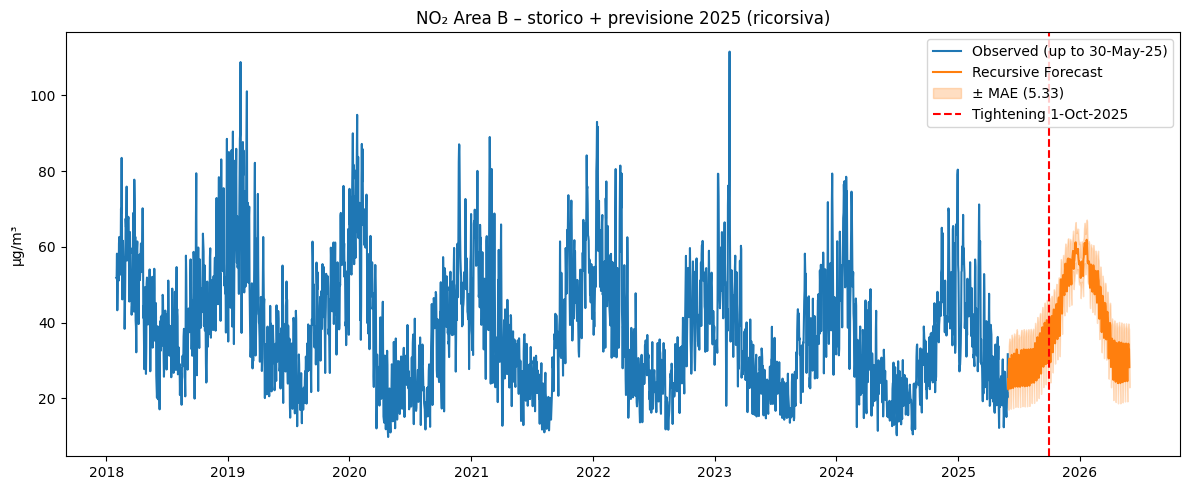

In [36]:
# ==============================================================
# 1 ▸ Costruiamo lo skeleton 31-mag → 31-dic-2025
# ==============================================================
forecast_idx = pd.date_range("2025-05-31", "2026-05-30", freq="D")
df_future    = pd.DataFrame(index=forecast_idx)

# flag normativi (nuovo inasprimento)
#df_future["after_2025tight"] = ((df_future.index >= "2025-10-01").astype(bool)).astype(int)
#df_future["after_areaB"]     = 1
#df_future["after_2022"]      = 1

# concat storia + futuro
df_all = pd.concat([df_train, df_future], axis=0)

# --------------------------------------------------------------
# 2 ▸ Pre-compute features statiche (calendaristiche)
# --------------------------------------------------------------
idx = df_all.index
df_all["is_weekend"] = (idx.dayofweek >= 5).astype(int)
df_all["sin_week"]   = np.sin(2*np.pi*idx.dayofweek/7)
df_all["cos_week"]   = np.cos(2*np.pi*idx.dayofweek/7)
df_all["sin_year"]   = np.sin(2*np.pi*idx.dayofyear/365.25)
df_all["cos_year"]   = np.cos(2*np.pi*idx.dayofyear/365.25)

# riserviamo le colonne dinamiche
for col in ["AreaB_mean_lag1","AreaB_mean_lag7","AreaB_mean_lag14",
            "AreaB_mean_roll7","AreaB_mean_roll30"]:
    df_all[col] = np.nan

# --------------------------------------------------------------
# 3 ▸ riempiamo i lag/rolling PER I GIORNI GIÀ OSSERVATI
# --------------------------------------------------------------
df_all.update(make_features(df_all))    # calcola per lo storico

# --------------------------------------------------------------
# 4 ▸ Loop ricorsivo: un giorno alla volta
# --------------------------------------------------------------
preds = []
for day in forecast_idx:
    # aggiorna lag del giorno corrente
    yesterday = day - pd.Timedelta(days=1)
    df_all.loc[day, "AreaB_mean_lag1"]  = df_all.loc[yesterday, "AreaB_mean"]
    df_all.loc[day, "AreaB_mean_lag7"]  = df_all.loc[day - pd.Timedelta(days=7), "AreaB_mean"]
    df_all.loc[day, "AreaB_mean_lag14"] = df_all.loc[day - pd.Timedelta(days=14), "AreaB_mean"]

    df_all.loc[day, "AreaB_mean_roll7"]  = df_all.loc[day - pd.Timedelta(days=7): yesterday, "AreaB_mean"].mean()
    df_all.loc[day, "AreaB_mean_roll30"] = df_all.loc[day - pd.Timedelta(days=30): yesterday, "AreaB_mean"].mean()

    # meteo: usa ultimo valore noto (ffill)
    for col in ["wind_speed_mean", "RH_mean"]:
        df_all.loc[day, col] = df_all.loc[yesterday, col]

    # features del modello
    X_day = df_all.loc[[day], feature_cols]
    y_hat = pipe.predict(X_day)[0]

    # salva predizione e scrivila in AreaB_mean per alimentare i lag successivi
    preds.append(y_hat)
    df_all.loc[day, "AreaB_mean"] = y_hat

# serie previsioni
y_forecast = pd.Series(preds, index=forecast_idx, name="forecast")

# --------------------------------------------------------------
# 5 ▸ Grafico con banda ±MAE
# --------------------------------------------------------------
MAE = 5.33
upper, lower = y_forecast + MAE, y_forecast - MAE

import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(df_hist["AreaB_mean"], label="Observed (up to 30-May-25)", color="tab:blue")
plt.plot(y_forecast,          label="Recursive Forecast",      color="tab:orange")
plt.fill_between(y_forecast.index, lower, upper,
                 color="tab:orange", alpha=0.25, label=f"± MAE ({MAE:.2f})")
plt.axvline(pd.Timestamp("2025-10-01"), ls="--", color="red",
            label="Tightening 1-Oct-2025")
plt.title("NO₂ Area B – storico + previsione 2025 (ricorsiva)")
plt.ylabel("µg/m³"); plt.legend(); plt.tight_layout(); plt.show()

In [ ]:
import joblib
joblib.dump(pipe, "/content/drive/MyDrive/data_science_lab_on_smart_cities/xgb_no2_areaB_policyphase.pkl")
print("Model saved as xgb_no2_areaB_policyphase.pkl")

Model saved as xgb_no2_areaB_policyphase.pkl
